# **Employees Attrition Analysis**

## *Business Problem Statement:*
A Company, established a few years ago, is grappling with a persistent 15% annual employee attrition rate. This high turnover is significantly impacting productivity, team morale, and operational costs. Analysis shows that replacing an employee costs approximately 1.5 to 2 times their annual salary and much more in lost productivity, translating to substantial financial losses for the company.
To address this issue, we propose conducting a comprehensive HR analytics study. By analyzing existing employee data, we aim to identify key factors contributing to attrition and develop targeted retention strategies. This data-driven approach will enable the company to make informed decisions, potentially reducing the attrition rate to below 10% within the next fiscal year and saving financial losses for the company.

## *Understanding the Problem and Creating a Project Statement:*
To effectively address the high attrition rate, we need to translate the business problem into a data science problem statement. This will guide us in generating relevant insights and following appropriate analytical steps.

**Attrition Rate:** The attrition rate quantifies employee turnover as a percentage. A healthy organization typically has an attrition rate of 10% or less. High attrition negatively impacts the company’s costs, productivity, and morale.

Given our company’s attrition rate above 15%, it is crucial to identify the underlying reasons to develop targeted retention strategies. 

**Key questions for analysis include:**

- How are the KPIs performing?
- How do employee demographics affect attrition?
- Are salary and financial incentives adequate?
- Do certain departments and job roles have higher attrition rates?
- Is the company’s work culture satisfactory?
- Which factors have the largest impact on attrition?

By answering these questions through data analysis, we aim to reduce the attrition rate to below 10% and mitigate financial losses.

*Project By:*
#### **Narendra Patil**

Data Analyst | Core Skills: Statistical Analysis, Problem Solving, Communication, Critical Thinking, Attention to Detail | Certified in Python, SQL, AI | Proficient in Python, SQL, Tableau, Power BI

- LinkedIn : https://www.linkedin.com/in/narendra-patil-583b242a1/
- Github : https://github.com/Narendraspatil
- Kaggle : https://www.kaggle.com/narendraspatil
- Instagram : https://www.instagram.com/visionindata/

### **Importing Required Libraries** 

In [3]:
import pandas as pd  # Importing pandas library for data processing

# Importing visualization libraries
import matplotlib.pyplot as plt  # Matplotlib for basic plotting functionality
import seaborn as sns  # Seaborn for statistical data visualization

# Importing Machine Learning Libraries
from sklearn.model_selection import train_test_split  # Function for splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier for building the model
from sklearn.preprocessing import LabelEncoder  # LabelEncoder for converting categorical labels into numeric values
from sklearn.impute import SimpleImputer  # SimpleImputer for handling missing values
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve  # Metrics for evaluating the model

In [4]:
# Loading the Employee Data into a Pandas DataFrame
df = pd.read_csv('Attrition data.csv')

## **Data Exploration**

In [5]:
df.head() # Displays the first 5 rows of the DataFrame 'df'

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [6]:
df.columns # enlist all the columns in the dataframe

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [7]:
df.info() # Displays a concise summary of the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
df.describe() # Generates descriptive statistics for the DataFrame 'df'

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


## **Data Cleaning**

In [9]:
# Drops specified columns from the DataFrame 'df' in place
df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18'], inplace=True) 

In [10]:
# Counting the total number of missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64


In [11]:
# Imputing missing values with mean values for the coulmn
df['NumCompaniesWorked'].fillna(3, inplace=True)
df['EnvironmentSatisfaction'].fillna(3, inplace=True)
df['JobSatisfaction'].fillna(3, inplace=True)
df['WorkLifeBalance'].fillna(3, inplace=True)

In [12]:
# Counting the total number of duplicated rows in the DataFrame
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [14]:
# Exporting the Cleaned Dataframe for making dashboard in Power BI
df.to_csv('Clean_HR_Data.csv', index=False)

## **Initial Observations and Descriptive Statistics**

In [13]:
# Number of employees
total_employees = df['EmployeeID'].nunique()

print("Total Number of Employees :", total_employees)

Total Number of Employees : 4410


In [14]:
# Total attrition
total_attrition = df['Attrition'].value_counts()['Yes']

print("Attrition :", total_attrition)

Attrition : 711


In [15]:
# Demographics of employees
demographics = df.groupby('Gender').size()

print("Demographics of Employees :", demographics)

Demographics of Employees : Gender
Female    1764
Male      2646
dtype: int64


In [16]:
# Number of departments and employees per department
departments = df['Department'].value_counts()

print("Number of Employees according to department :", departments)

Number of Employees according to department : Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64


In [17]:
# Number of employees per job role
job_roles = df['JobRole'].value_counts()

print("Total Number of Employees as per job role :", job_roles)

Total Number of Employees as per job role : JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count, dtype: int64


In [18]:
# Number of employees per job level
job_levels = df['JobLevel'].value_counts()

print("Total Number of Employees as per job level :", job_levels)

Total Number of Employees as per job level : JobLevel
1    1629
2    1602
3     654
4     318
5     207
Name: count, dtype: int64


## **Calculating KPIs**

In [19]:
# Total attrition
total_attrition = df['Attrition'].value_counts()['Yes']


# Attrition rate = ( Attrition / Total Employees ) * 100
attrition_rate = (df['Attrition'].value_counts()['Yes'] / df['Attrition'].value_counts().sum()) * 100

print('Attrition =' , total_attrition)
print('Attrition Rate =' , attrition_rate, '%')

Attrition = 711
Attrition Rate = 16.122448979591837 %


In [20]:
# Total retention
total_retention = df['Attrition'].value_counts()['No']


# Retention rate
retention_rate = (df['Attrition'].value_counts()['No'] / df['Attrition'].value_counts().sum()) * 100

print('Retention =' , total_retention)
print('Retention Rate =' , retention_rate, '%')

Retention = 3699
Retention Rate = 83.87755102040816 %


In [21]:
# Count of employees leaving each department
count_leaving_per_dept = df[df['Attrition'] == 'Yes']['Department'].value_counts()
count_remaining_per_dept = df[df['Attrition'] == 'No']['Department'].value_counts()

result = pd.DataFrame({
    'Attrition per department': count_leaving_per_dept,
    'Retention per department': count_remaining_per_dept
})

result

,Attrition per department,Retention per department
Department,,
Research & Development,453,2430
Sales,201,1137
Human Resources,57,132


In [22]:
# Attrition and retention rates per department
attrition_per_dept = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True) * 100

retention_per_dept = df[df['Attrition'] == 'No']['Department'].value_counts(normalize=True) * 100

result = pd.DataFrame({
    'Attrition Rate (%)': attrition_per_dept,
    'Retention Rate (%)': retention_per_dept
})

result

,Attrition Rate (%),Retention Rate (%)
Department,,
Research & Development,63.713080,65.693431
Sales,28.270042,30.738037
Human Resources,8.016878,3.568532


In [23]:
# Average salary
avg_salary = df['MonthlyIncome'].mean()

print('Average Salary =' , avg_salary)

Average Salary = 65029.31292517007


In [24]:
# Average salary by job level
avg_salary_by_job_level = df.groupby('JobLevel')['MonthlyIncome'].mean()

avg_salary_by_job_level

JobLevel
1    62677.421731
2    65506.479401
3    63545.321101
4    77940.754717
5    64698.405797
Name: MonthlyIncome, dtype: float64

In [25]:
# Average salary as per department
avg_salary_by_Department = df.groupby('Department')['MonthlyIncome'].mean()

avg_salary_by_Department

Department
Human Resources           57904.444444
Research & Development    67187.960458
Sales                     61384.484305
Name: MonthlyIncome, dtype: float64

In [26]:
# Average salary hike
avg_salary_hike = df['PercentSalaryHike'].mean()

print('Average Salary Hike =' , avg_salary_hike, '%')

Average Salary Hike = 15.209523809523809 %


In [27]:
# Average performance rating
avg_performance_rating = df['PerformanceRating'].mean()

print('Average Performance Rating of Employees =' , avg_performance_rating)

Average Performance Rating of Employees = 3.1537414965986397


In [28]:
# Average distance from home to office
avg_distance = df['DistanceFromHome'].mean()

print('Average distance from home to office =' , avg_distance)

Average distance from home to office = 9.19251700680272


In [29]:
# Average Experience of Employees
avg_working_years = df['TotalWorkingYears'].mean()

print('Average Experience of Employees =' , avg_working_years)

Average Experience of Employees = 11.279936378095888


In [30]:
# Average Rating for Work Environment
avg_env_rating = df['EnvironmentSatisfaction'].mean()

print('Average Rating for Work Environment =' , avg_env_rating)

Average Rating for Work Environment = 2.725170068027211


In [31]:
# Average Rating for Job Satisfaction
avg_job_satisfacrion = df['JobSatisfaction'].mean()

print('Average Rating for Job Satisfaction =' , avg_job_satisfacrion)

Average Rating for Job Satisfaction = 2.7294784580498868


In [32]:
# Average Rating for Work Life Balance
avg_work_life_balance = df['WorkLifeBalance'].mean()

print('Average Rating for Work Life Balance =' , avg_work_life_balance)

Average Rating for Work Life Balance = 2.7634920634920634


## **Analysing Factors contributing to Attrition of Employees**

### *Demographics*

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


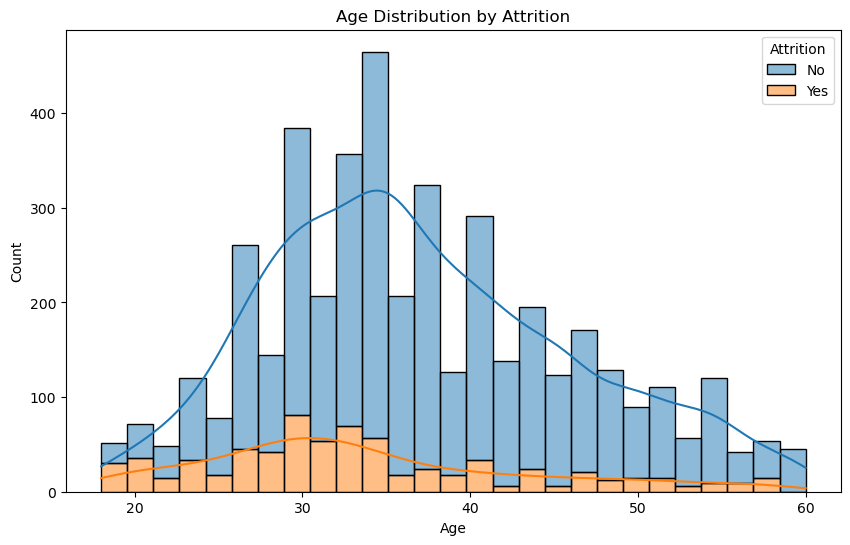

In [33]:
# Age
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Attrition', multiple='stack', kde=True)
plt.title('Age Distribution by Attrition')
plt.show()

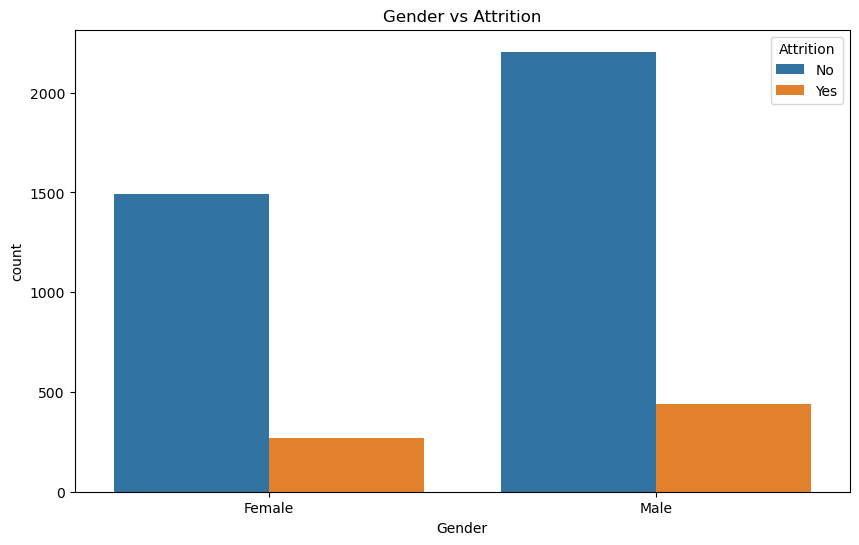

In [34]:
# Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Gender vs Attrition')
plt.show()

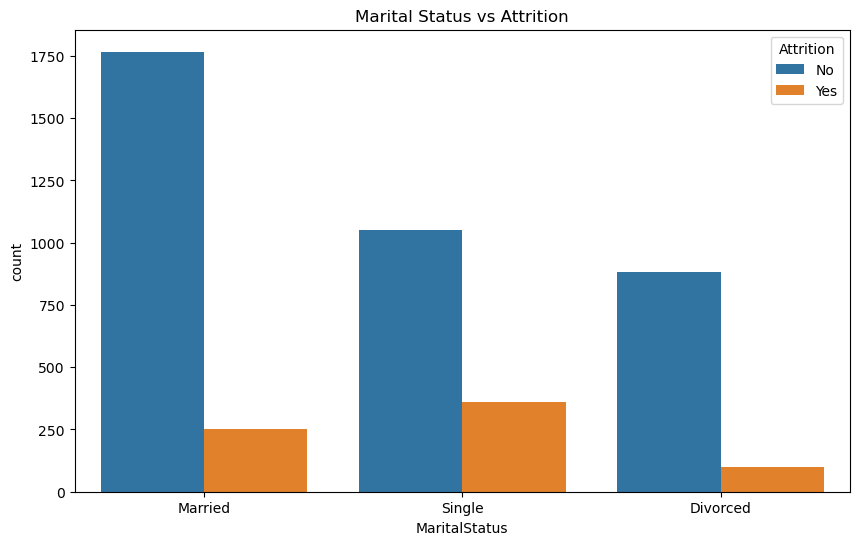

In [35]:
# Marital Status
plt.figure(figsize=(10, 6))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
plt.title('Marital Status vs Attrition')
plt.show()

### *Salary and Financial Incentives*

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


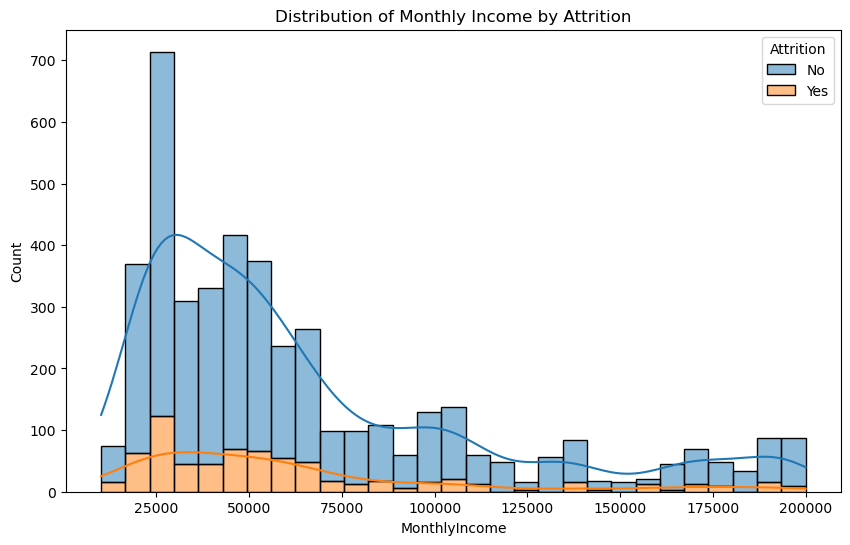

In [37]:
# Histogram for Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(df, x='MonthlyIncome', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Monthly Income by Attrition')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


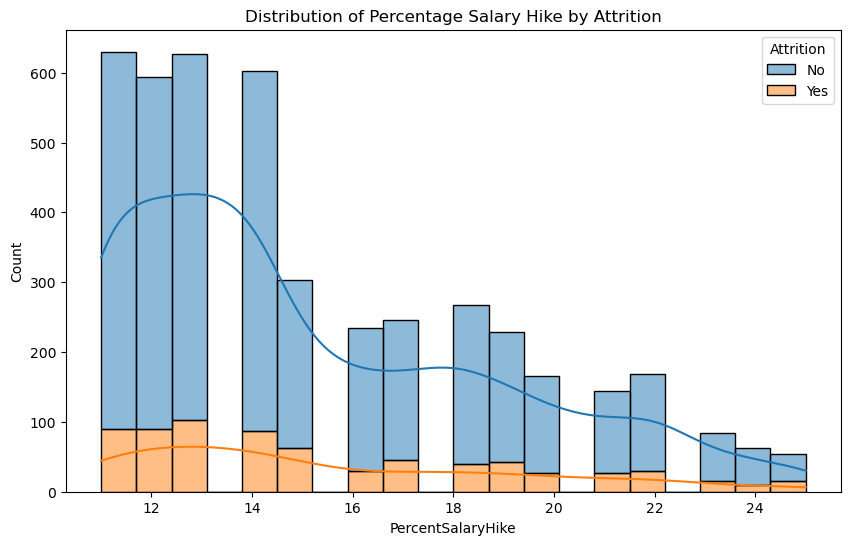

In [38]:
# Histogram for Percentage Salary Hike
plt.figure(figsize=(10, 6))
sns.histplot(df, x='PercentSalaryHike', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Percentage Salary Hike by Attrition')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


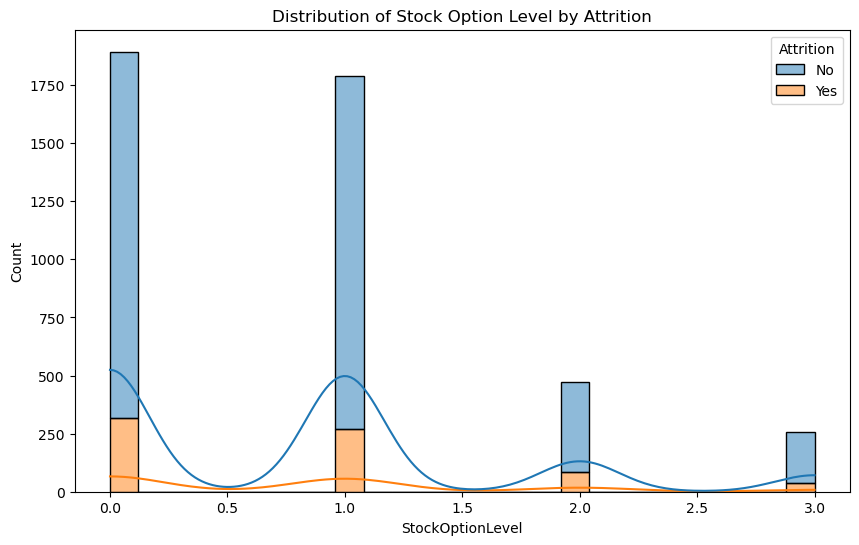

In [39]:
# Histogram for Stock Option Level
plt.figure(figsize=(10, 6))
sns.histplot(df, x='StockOptionLevel', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Stock Option Level by Attrition')
plt.show()

### *Job Related Factors*

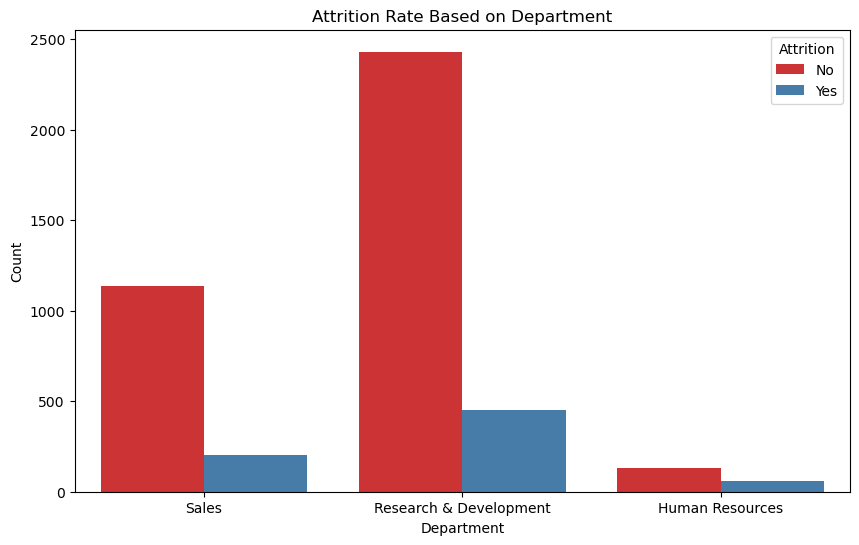

In [57]:
# Deparment
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Department')
plt.ylabel('Count')
plt.show()

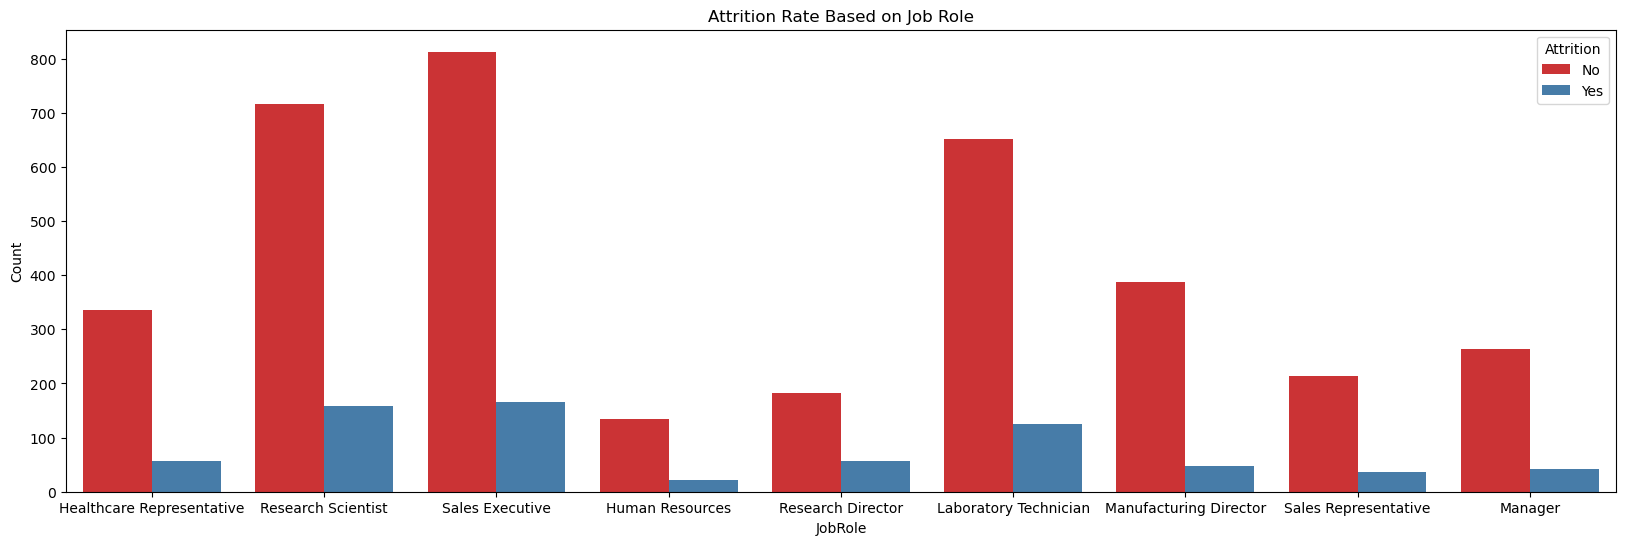

In [53]:
# Job Role
plt.figure(figsize=(20, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Job Role')
plt.ylabel('Count')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


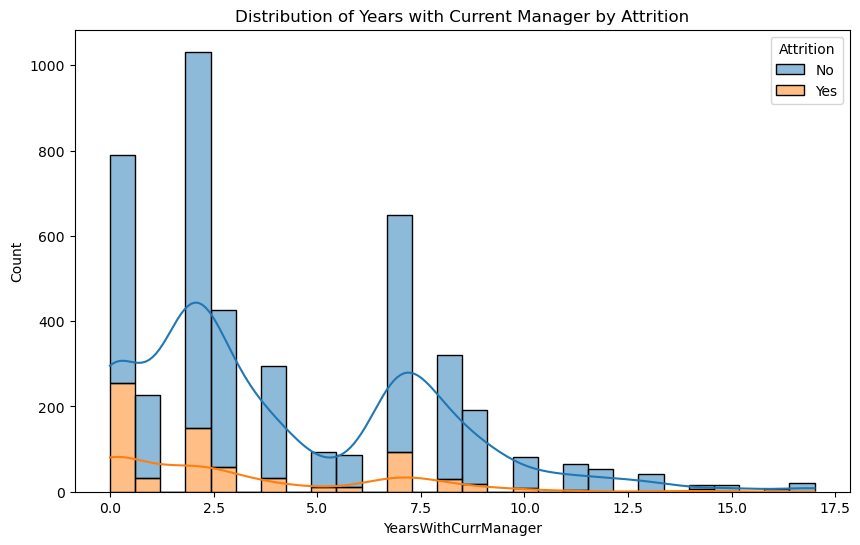

In [58]:
# Histogram for Years with Current Manager
plt.figure(figsize=(10, 6))
sns.histplot(df, x='YearsWithCurrManager', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Years with Current Manager by Attrition')
plt.show()

### *Work Environment and Job Satisfaction*

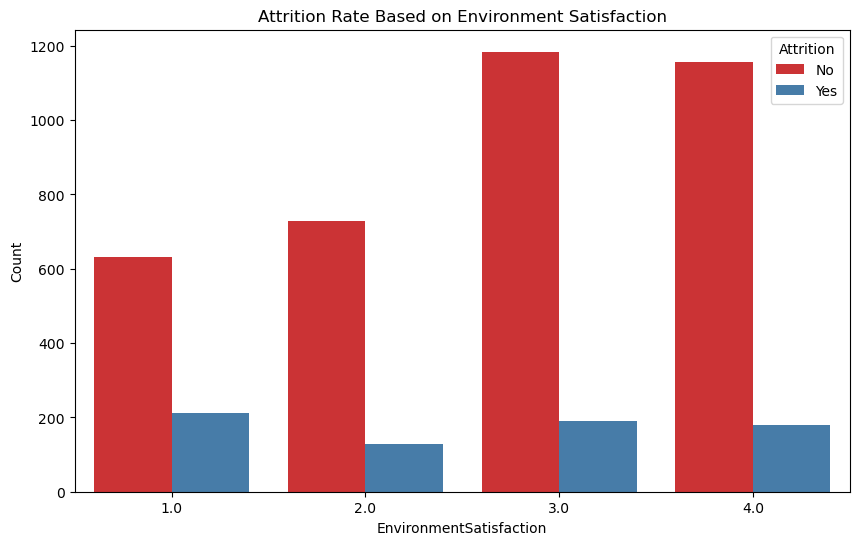

In [40]:
# Environment Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Environment Satisfaction')
plt.ylabel('Count')
plt.show()

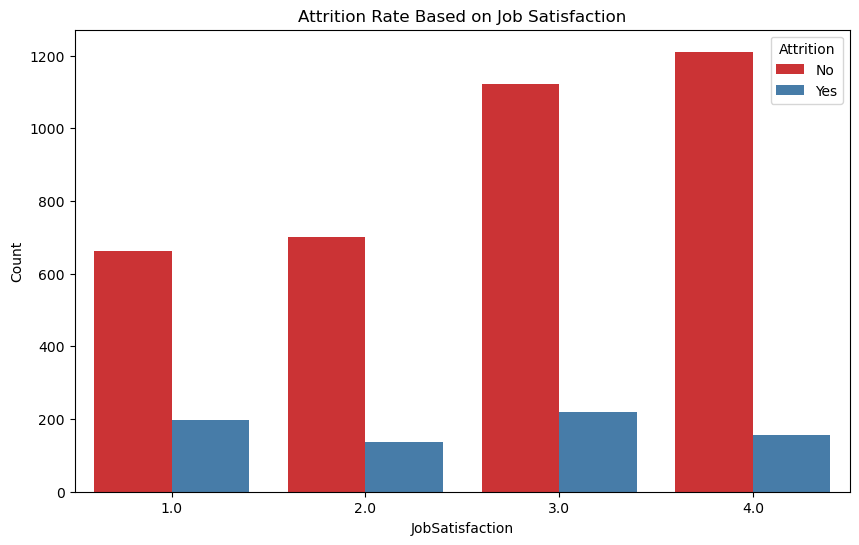

In [41]:
# Job Satisfaction
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Job Satisfaction')
plt.ylabel('Count')
plt.show()

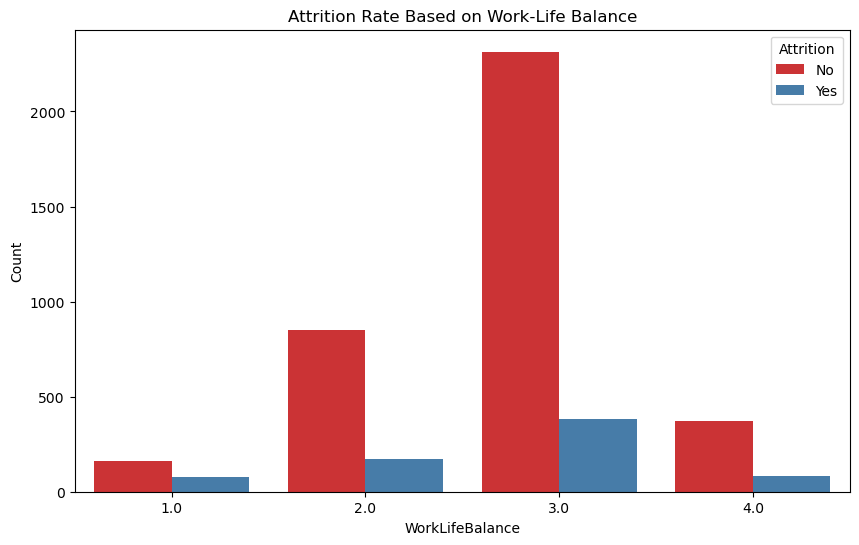

In [42]:
# Work-Life Balance
plt.figure(figsize=(10, 6))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Work-Life Balance')
plt.ylabel('Count')
plt.show()

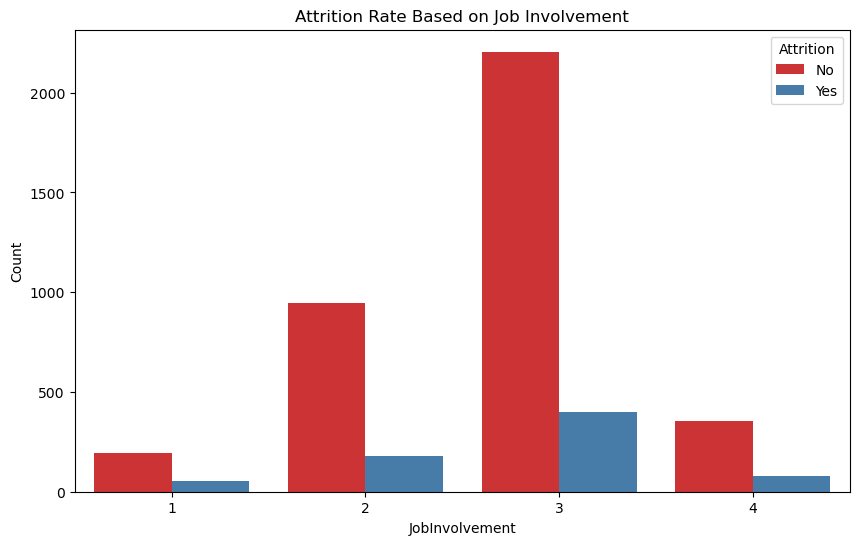

In [43]:
# Job Involvement
plt.figure(figsize=(10, 6))
sns.countplot(x='JobInvolvement', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Job Involvement')
plt.ylabel('Count')
plt.show()

### *Career Progression*

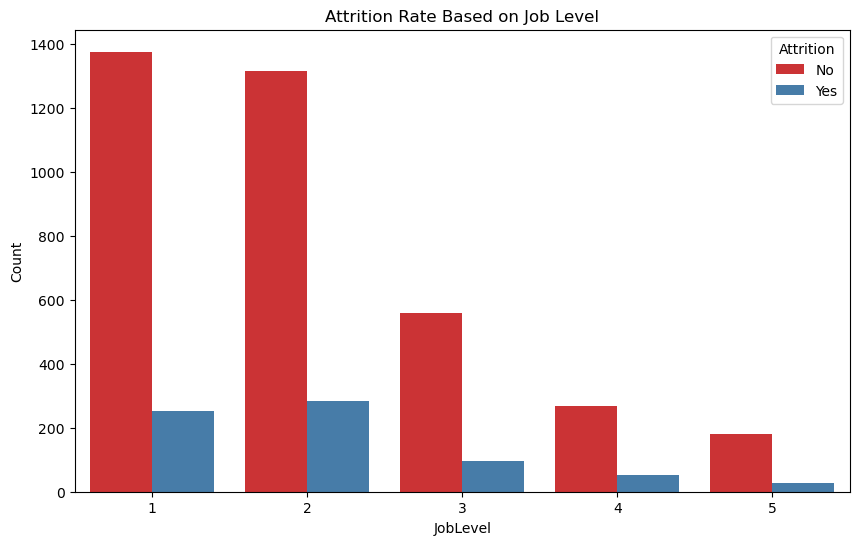

In [44]:
# Job Level
plt.figure(figsize=(10, 6))
sns.countplot(x='JobLevel', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Job Level')
plt.ylabel('Count')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


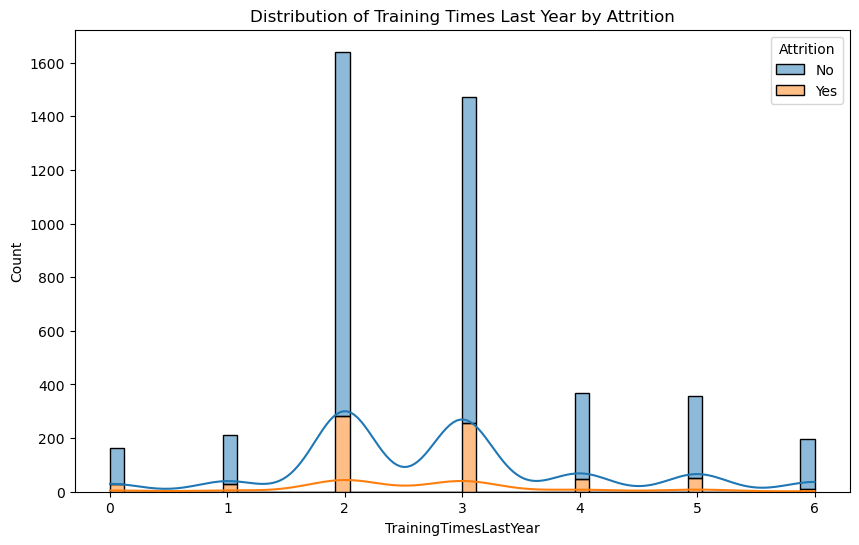

In [45]:
# Histogram for Training Times Last Year
plt.figure(figsize=(10, 6))
sns.histplot(df, x='TrainingTimesLastYear', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Training Times Last Year by Attrition')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


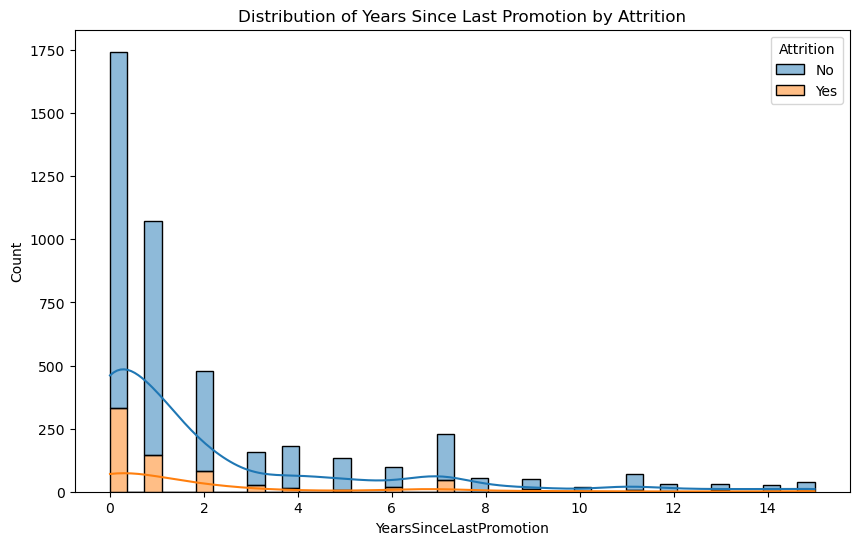

In [46]:
# Histogram for Years Since Last Promotion
plt.figure(figsize=(10, 6))
sns.histplot(df, x='YearsSinceLastPromotion', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Years Since Last Promotion by Attrition')
plt.show()

### *Commute and Travelling*

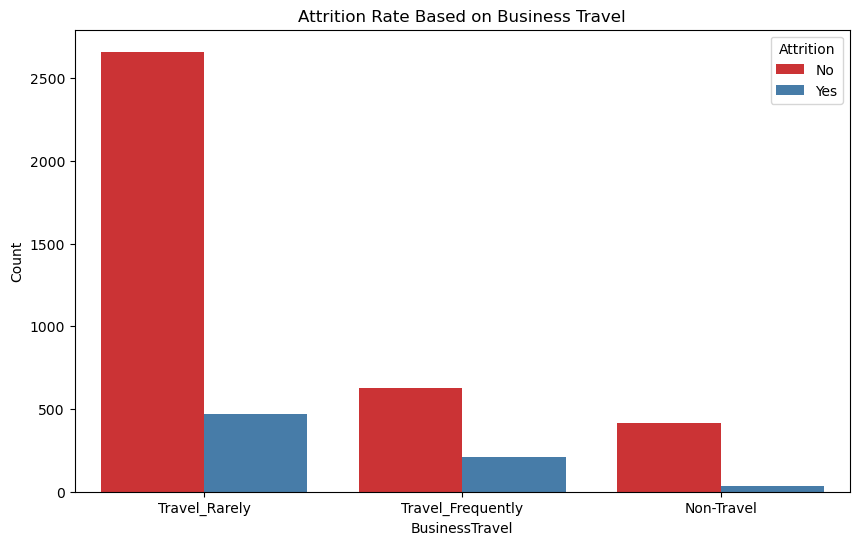

In [47]:
# Business Travel
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Business Travel')
plt.ylabel('Count')
plt.show()

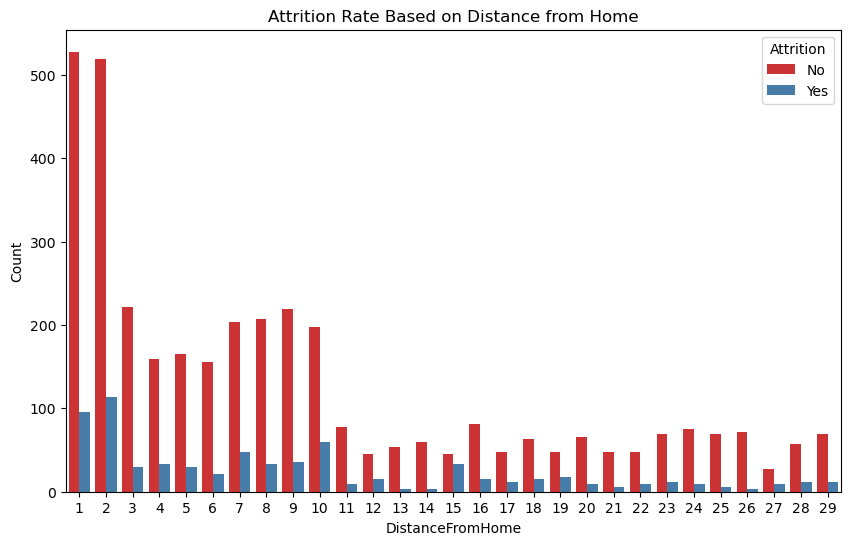

In [48]:
# Distance from Home to Work
plt.figure(figsize=(10, 6))
sns.countplot(x='DistanceFromHome', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Distance from Home')
plt.ylabel('Count')
plt.show()

### *Employee Performance and History*

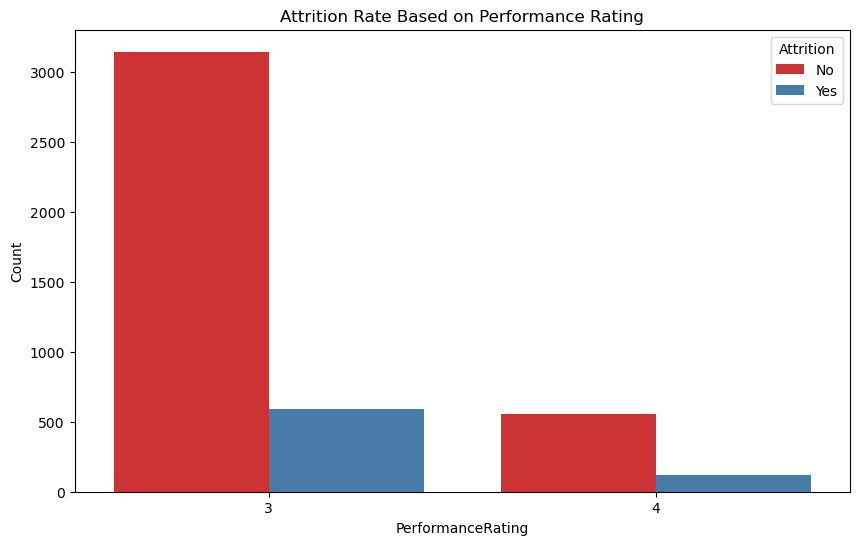

In [49]:
# Distance from Performance Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition Rate Based on Performance Rating')
plt.ylabel('Count')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


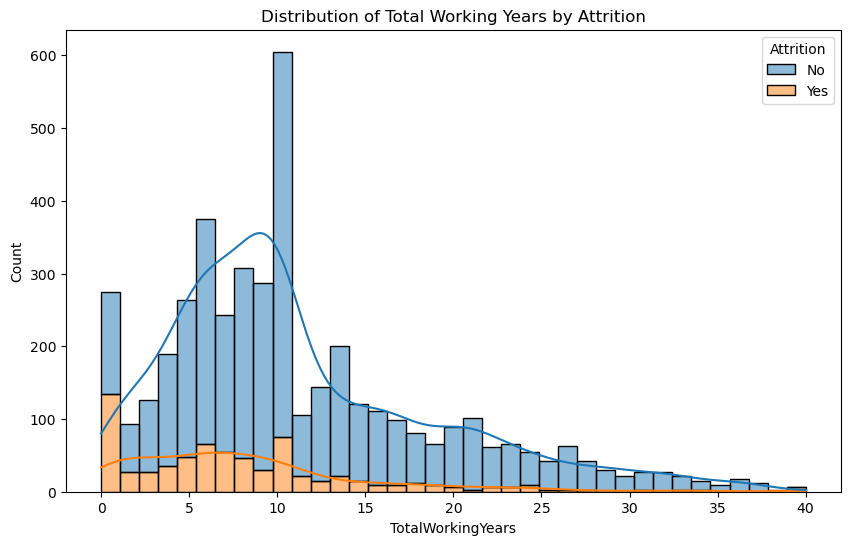

In [50]:
# Histogram for Total Working Years
plt.figure(figsize=(10, 6))
sns.histplot(df, x='TotalWorkingYears', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Total Working Years by Attrition')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


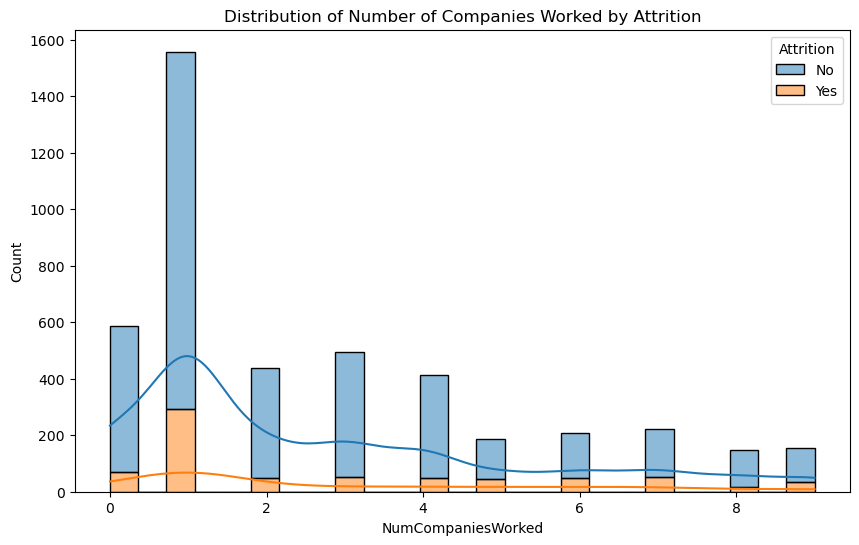

In [51]:
# Histogram for Number of Companies Worked
plt.figure(figsize=(10, 6))
sns.histplot(df, x='NumCompaniesWorked', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Number of Companies Worked by Attrition')
plt.show()

c:\Users\Naren\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


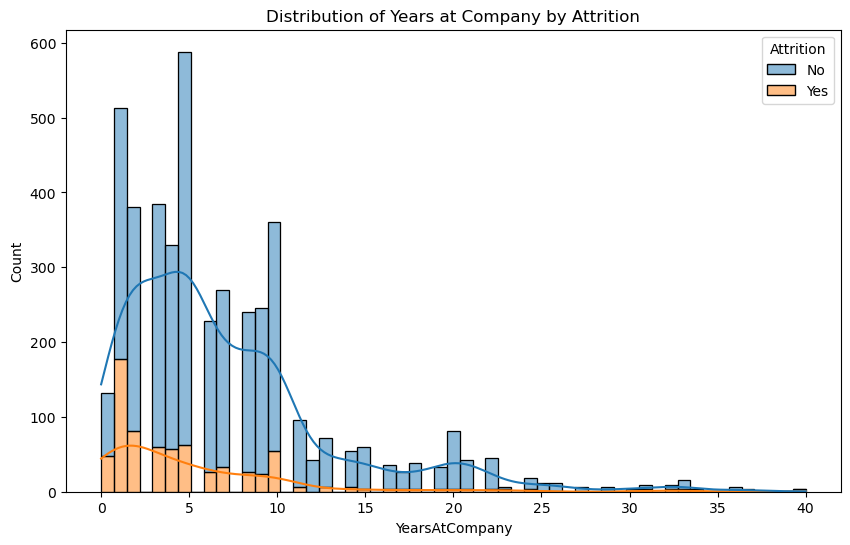

In [52]:
# Histogram for Years at Company
plt.figure(figsize=(10, 6))
sns.histplot(df, x='YearsAtCompany', hue='Attrition', multiple='stack', kde=True)
plt.title('Distribution of Years at Company by Attrition')
plt.show()

## **Correlation Analysis**

The correlation matrix heatmap visually represents the Pearson correlation coefficients between pairs of features in the dataset. Each cell in the matrix shows the correlation between the variables on the respective x and y axes. The color intensity indicates the strength of the correlation, with dark red representing strong positive correlations, dark blue representing strong negative correlations, and lighter shades indicating weaker correlations.

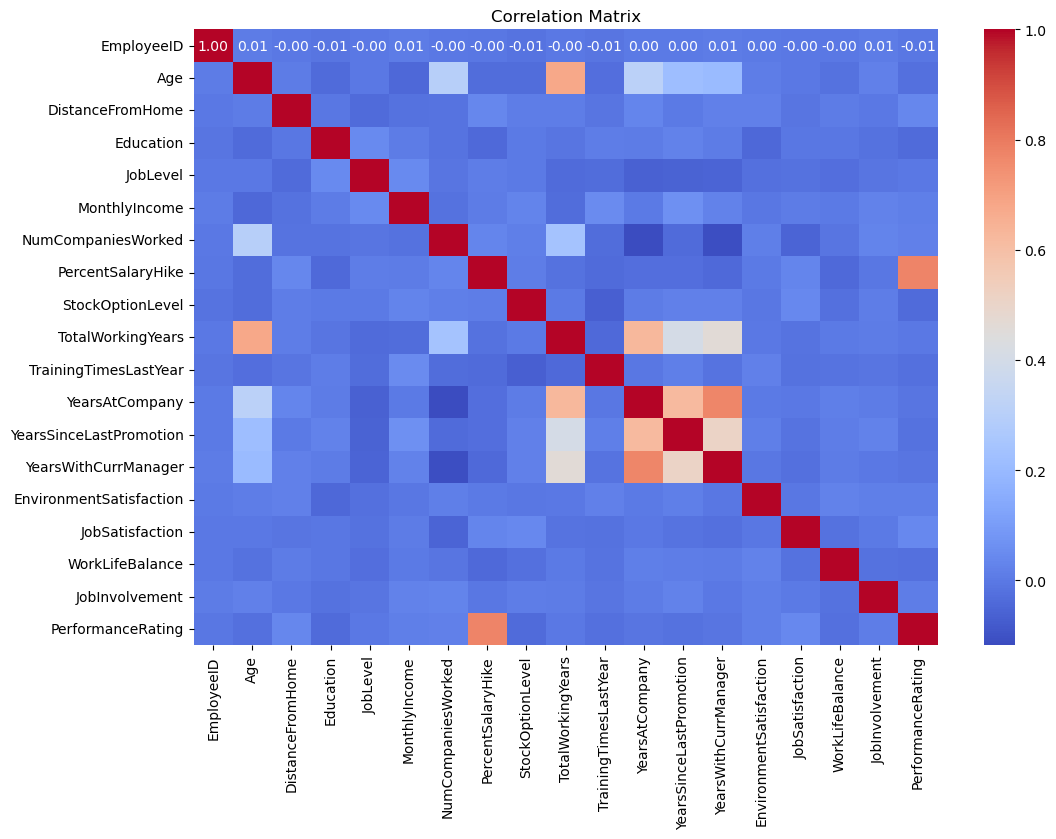

In [59]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

*Observations:*
1. **Age and Total Working Years**: There is a strong positive correlation between Age and Total Working Years, indicating that as employees age, their total working years increase. This is expected and logical.

2. **Job Level and Monthly Income**: Job Level and Monthly Income are highly positively correlated, suggesting that higher job levels are associated with higher monthly incomes.

3. **Years At Company and Years With Current Manager**: These two features show a significant positive correlation, meaning that employees who have been with the company longer tend to have spent more time with their current manager.

4. **Years Since Last Promotion and Years At Company**: There is a notable positive correlation here, indicating that the longer an employee has been at the company, the more years it has been since their last promotion.

5. **Environment Satisfaction, Job Satisfaction, and Work-Life Balance**: These factors are moderately correlated with each other, suggesting that employees who are satisfied with their work environment are also likely to be satisfied with their jobs and have a good work-life balance.

6. **Low Correlation with Performance Rating**: Performance Rating shows relatively low correlation with most other features, indicating that performance ratings might be influenced by various other unmeasured factors or may not directly influence other aspects of the employee's profile.

7. **Employee ID**: As expected, Employee ID shows no correlation with any other variables, as it is just a unique identifier.

This correlation matrix helps in understanding the relationships between different features, which is crucial for feature selection and building effective predictive models for employee attrition.

## **Feature Analysis and Predictive Analysis**

Feature analysis and predictive analysis are key components of our HR analytics project, helping us understand the factors driving employee attrition and simulating policy changes to predict their impact.

**Feature Analysis**:
Feature analysis aims to identify which features in our dataset contribute most to employee attrition. By using a RandomForestClassifier, we can rank the importance of various features, such as age, salary, job role, and job satisfaction, to determine their influence on attrition. This analysis provides a clear understanding of the key drivers behind employee turnover.

**Predictive Analysis**:
Predictive analysis involves simulating different policy changes to estimate their potential effects on the attrition rate. Using the simulation method, we apply changes to factors like monthly income, salary hikes, and stock option levels, and predict how these changes would influence employee attrition. This method allows us to examine the effectiveness of proposed policies in reducing the attrition rate.

**Methodology**:
1. **Data Preparation**: Drop unnecessary columns, encode categorical variables, and handle missing values using imputation with the mean strategy.
2. **Feature Analysis**:
   - Define features and target variable.
   - Train a RandomForestClassifier to determine feature importances.
   - Visualize feature importances using a bar plot.
3. **Predictive Analysis**:
   - Split the data into training and test sets.
   - Train a RandomForestClassifier on the training data.
   - Evaluate the model using confusion matrix, classification report, and ROC curve.
   - Simulate policy changes by adjusting features like monthly income, salary hike, and stock option levels.
   - Predict attrition probabilities for current employees with the modified features.
   - Calculate the new attrition rate and compare it to the baseline to determine the effectiveness of the policy changes.

This comprehensive approach ensures that we not only identify the key factors contributing to attrition but also test potential strategies to mitigate it, providing actionable insights for improving employee retention.

In [60]:
# Drop unnecessary columns
columns_to_drop = ['EmployeeID', 'Department', 'Education', 'EducationField']
df_cleaned = df.drop(columns=columns_to_drop)

In [61]:
# Encode categorical variables
label_encoders = {}
for column in df_cleaned.select_dtypes(include=['object', 'category']):
    label_encoders[column] = LabelEncoder()
    df_cleaned[column] = label_encoders[column].fit_transform(df_cleaned[column])

In [62]:
# Define features and target
X = df_cleaned.drop(columns=['Attrition'])
y = df_cleaned['Attrition']

# Assuming 'Yes' and 'No' are the current values in y, convert them to numerical values
y = y.replace({'Yes': 1, 'No': 0})

In [63]:
# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame (if needed)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

                    Feature  Importance
7             MonthlyIncome    0.096853
0                       Age    0.096023
11        TotalWorkingYears    0.083315
2          DistanceFromHome    0.065779
13           YearsAtCompany    0.063524
9         PercentSalaryHike    0.059343
8        NumCompaniesWorked    0.052859
5                   JobRole    0.051005
15     YearsWithCurrManager    0.046668
16  EnvironmentSatisfaction    0.043047
17          JobSatisfaction    0.042516
14  YearsSinceLastPromotion    0.040980
6             MaritalStatus    0.039074
12    TrainingTimesLastYear    0.038792
18          WorkLifeBalance    0.035787
19           JobInvolvement    0.032463
4                  JobLevel    0.032293
10         StockOptionLevel    0.029584
1            BusinessTravel    0.025246
3                    Gender    0.015669
20        PerformanceRating    0.009180


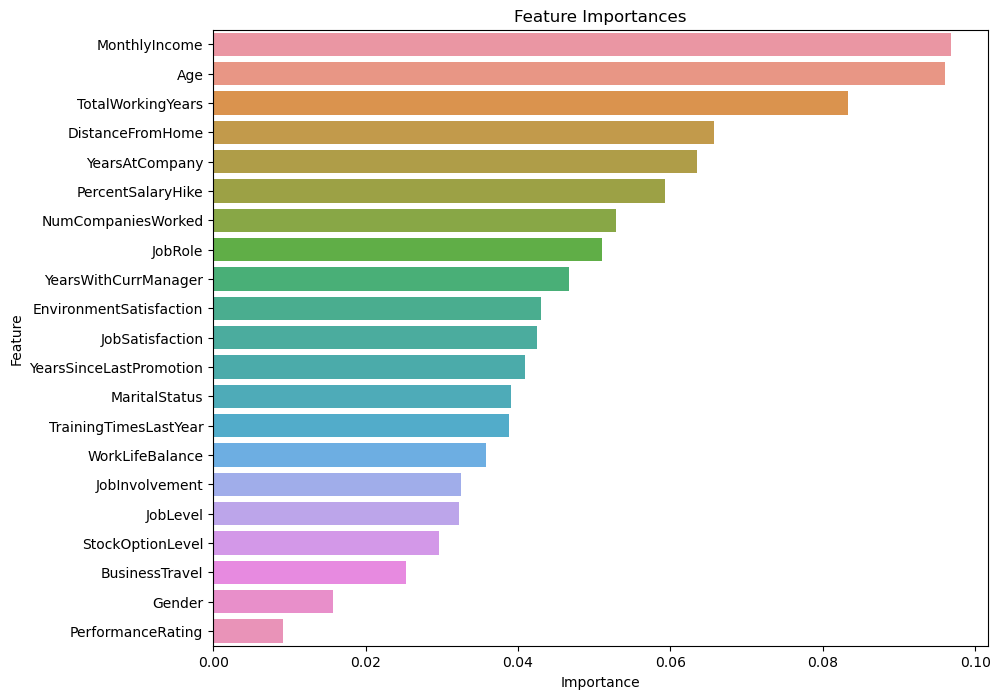

In [64]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model
model.fit(X_imputed, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X_imputed.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances for debugging
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


*Predicting the Decrease in Attrition Rate By Simulating Policy Changes*

In [65]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [66]:
# Initialize and train the RandomForest model
model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2.fit(X_train, y_train)

# Predictions on the test set
y_pred = model_2.predict(X_test)

In [67]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

Confusion Matrix:
 [[741   0]
 [  7 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       741
           1       1.00      0.95      0.97       141

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.98       882
weighted avg       0.99      0.99      0.99       882



In [68]:
# Copy the current employees' data
current_employees = X_imputed.copy()

# Simulate policy changes
# increase MonthlyIncome by 15%, PercentSalaryHike by 10%, and StockOptionLevel by 1
current_employees['MonthlyIncome'] *= 1.15
current_employees['PercentSalaryHike'] += 10
current_employees['StockOptionLevel'] = np.clip(current_employees['StockOptionLevel'] + 1, 0, 3)

In [69]:
# Predict attrition probabilities for current employees after policy changes
X_current_modified = current_employees
predicted_probabilities = model_2.predict_proba(X_current_modified)[:, 1]

# Predict attrition based on a threshold (e.g., 0.5)
current_employees['Predicted_Attrition'] = (predicted_probabilities > 0.5).astype(int)
predicted_attrition_count = current_employees['Predicted_Attrition'].sum()

# Calculate the new attrition rate
total_employees = len(current_employees)
new_attrition_rate = predicted_attrition_count / total_employees

In [70]:
# Calculate the current attrition rate
baseline_attrition_rate = attrition_rate / 100

# Calculate the percentage decrease
percentage_decrease = ((baseline_attrition_rate - new_attrition_rate) / baseline_attrition_rate) * 100

print(f"Baseline Attrition Rate: {baseline_attrition_rate:.2%}")
print(f"New Attrition Rate: {new_attrition_rate:.2%}")
print(f"Predicted Percentage Decrease in Attrition Rate: {percentage_decrease:.2f}%")

Baseline Attrition Rate: 16.12%
New Attrition Rate: 15.08%
Predicted Percentage Decrease in Attrition Rate: 6.47%


These simulated changes indicate a potential reduction in attrition by 6.47%, suggesting that enhancing financial incentives can effectively improve employee retention. This predictive analysis demonstrates the value of targeted policy changes in reducing turnover and highlights the importance of competitive compensation packages.

#### **The End**